In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn import metrics
from scipy.stats.mstats import gmean
import warnings

warnings.filterwarnings('ignore') 
os.environ["OMP_NUM_THREADS"] = str(2)
plt.rcParams['figure.constrained_layout.use'] = True # 自动约束布局

In [90]:
df = pd.read_csv('data_preprocessed(新特征归一化).csv', parse_dates=[0])
df.drop(['Date', 'Contest number', 'Number of  reported results', 'Number in hard mode'], axis=1, inplace=True)
df.head()

,Word,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),letter_freq_score,letter_dup,word_freq_score,word_sim,bigram_freq_score
0,slump,1.000000,3.000000,23.000000,39.000000,24.000000,9.000000,1.000000,0.381061,0.0,0.378564,0.260870,0.411294
1,crank,1.000000,5.000000,23.000000,31.000000,24.000000,14.000000,2.000000,0.508926,0.0,0.430813,0.521739,0.594332
2,gorge,1.000000,3.000000,13.000000,27.000000,30.000000,22.000000,4.000000,0.682474,1.0,0.386898,0.217391,0.570721
3,query,1.000000,4.000000,16.000000,30.000000,30.000000,17.000000,2.000000,0.137907,0.0,0.437274,0.043478,0.596806
4,drink,0.990099,8.910891,34.653465,33.663366,15.841584,4.950495,0.990099,0.498868,0.0,0.700724,0.173913,0.579820


In [91]:
data = df.iloc[:,1:8]
data_clr = data.copy()
data_clr[data_clr==0] = data_clr[data_clr==0] + 0.000001
gm = data_clr.apply(lambda x: gmean(x), axis=1)
data_clr = data_clr.apply(lambda x: np.log(x/gm))

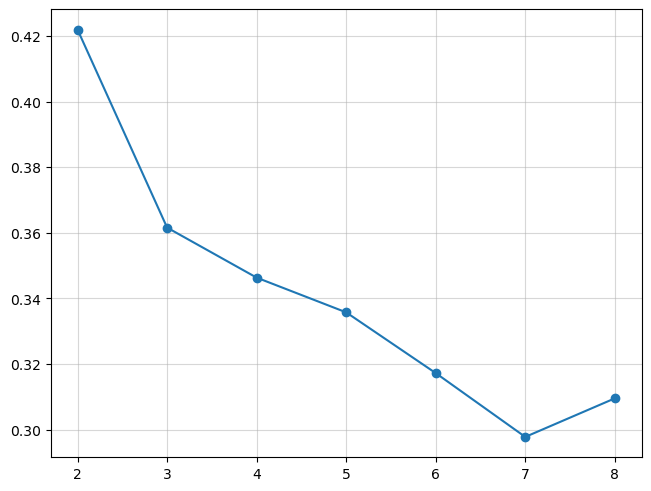

In [92]:
from sklearn.metrics import silhouette_score
sil_score = []
for i in range(2,9):
    kmeans = KMeans(i, random_state=0, n_init='auto').fit(data)
    sil_score.append(silhouette_score(data, kmeans.labels_))
plt.plot(range(2,9), sil_score, marker='o')
plt.grid(alpha=0.5)

# plt.savefig('elbow_for_kmeans.svg')
plt.show()

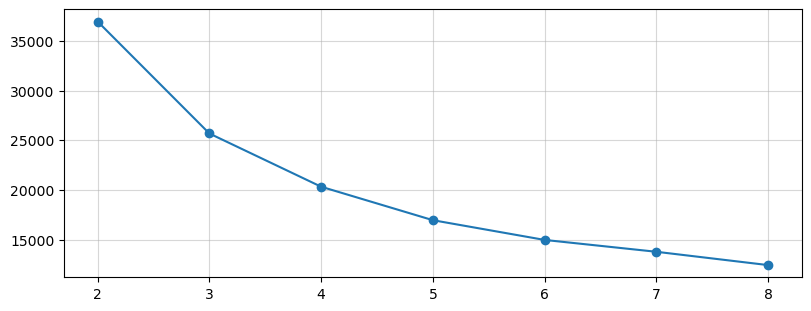

In [93]:
inertia = []
plt.figure(figsize=(8,3))
for i in range(2,9):
    kmeans = KMeans(i, random_state=0, n_init='auto').fit(data)
    inertia.append(kmeans.inertia_)
plt.plot(range(2,9), inertia, marker='o')
plt.grid(alpha=0.5)

plt.savefig('elbow_for_kmeans.svg')
plt.show()

In [94]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=88, n_init="auto").fit(data)
for i in range(n_clusters):
    word_ls = list(df['Word'][kmeans.labels_==i])
    word_ls = sorted(word_ls)
    print(word_ls)

['admit', 'adore', 'alien', 'aloud', 'angry', 'aorta', 'apply', 'apron', 'asset', 'atoll', 'atone', 'avert', 'black', 'bland', 'braid', 'brine', 'chafe', 'chant', 'charm', 'chest', 'chief', 'choke', 'chord', 'chunk', 'chute', 'clean', 'cloth', 'clown', 'could', 'cramp', 'crept', 'crimp', 'denim', 'depot', 'depth', 'doubt', 'dream', 'drink', 'drive', 'farce', 'fault', 'feast', 'flair', 'float', 'flout', 'glory', 'grate', 'happy', 'heist', 'hoard', 'inept', 'inert', 'input', 'irony', 'itchy', 'joust', 'lapse', 'light', 'loser', 'lunar', 'manor', 'maple', 'march', 'merit', 'metal', 'moist', 'money', 'mount', 'mourn', 'nasty', 'night', 'onset', 'other', 'panic', 'pause', 'peach', 'photo', 'plant', 'pleat', 'point', 'poise', 'prick', 'prime', 'rainy', 'recap', 'rival', 'robin', 'robot', 'rusty', 'saint', 'saute', 'scare', 'scorn', 'scour', 'scrap', 'shine', 'shire', 'shown', 'slate', 'sloth', 'sneak', 'solar', 'spade', 'spiel', 'spoke', 'stair', 'stale', 'stein', 'stick', 'sting', 'stomp', 

In [95]:
kml = pd.DataFrame([((df.iloc[kmeans.labels_==i,1:8] * [1,2,3,4,5,6,7]).mean()).sum() for i in range(3)], columns=['mean'])
kml.sort_values('mean', inplace=True)
kml['label'] = range(1,4)
kml.sort_index(inplace=True)
kml

,mean,label
0,381.697979,1
1,425.258777,2
2,475.501753,3


In [96]:
eerie = [[0.006717746, 0.0848636, 0.2307775, 0.28859, 0.2070382, 0.1230189, 0.05899406]]
kmeans.predict(eerie)

# kmeans.predict([[0.002720021,0.07607339,0.2947729,0.3631916,0.1927788,0.06082386,0.009639475]])

array([2])

In [97]:
pca = PCA(n_components=2)
pca.fit(data)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

data_2d = pca.transform(data)

[0.70784366 0.21764785]
[223.50652412 123.93635631]


In [98]:
eerie_2d = pca.transform(eerie)

In [99]:
data_more = data.copy()
data_more['Dif'] = (df.iloc[:,1:8] * [1,2,3,4,5,6,7]).sum(axis=1)
data_more.sort_values(by='Dif', inplace=True)
data_more['sort_id'] = np.arange(data_more.shape[0])

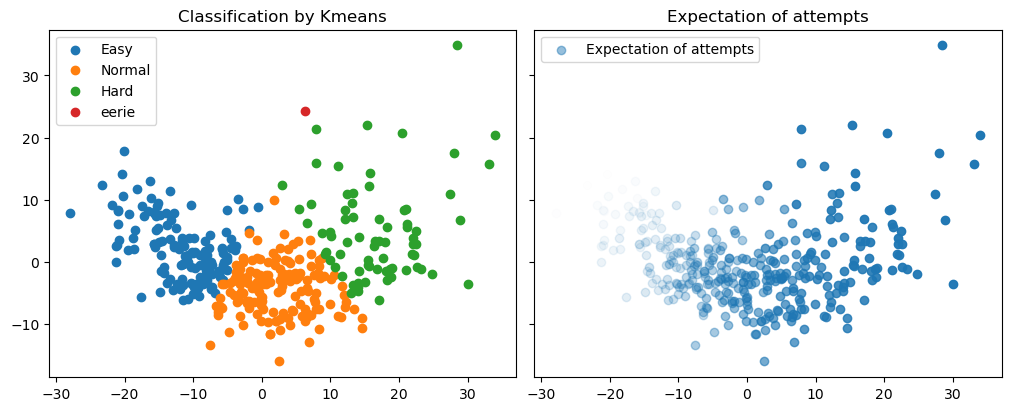

In [106]:
labels = ['Easy', 'Normal', 'Hard']
# dot_size = 20
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True, sharex=True)
for i in range(n_clusters):
    axes[0].scatter(data_2d[kmeans.labels_==i,0], data_2d[kmeans.labels_==i,1], label=labels[i])
axes[0].scatter(eerie_2d[:,0], eerie_2d[:,1], label='eerie')
axes[0].legend()
axes[0].set_title('Classification by Kmeans')

for i in range(data.shape[0]):
    axes[1].scatter(data_2d[i,0], data_2d[i,1], c='#1f77b4', alpha=data_more.sort_id[i]/data.shape[0])
axes[1].legend(labels=['Expectation of attempts'])
axes[1].set_title('Expectation of attempts')

plt.savefig('kmeans_pca.svg')
plt.show()

In [78]:
data.shape

(359, 7)

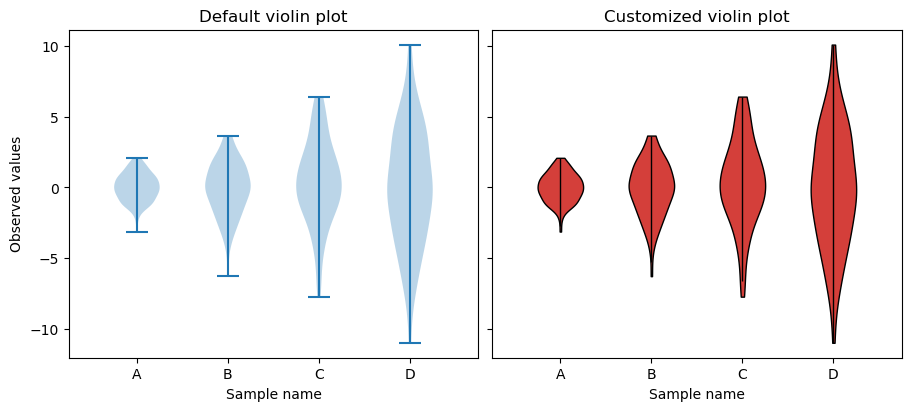

In [81]:
import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
# ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

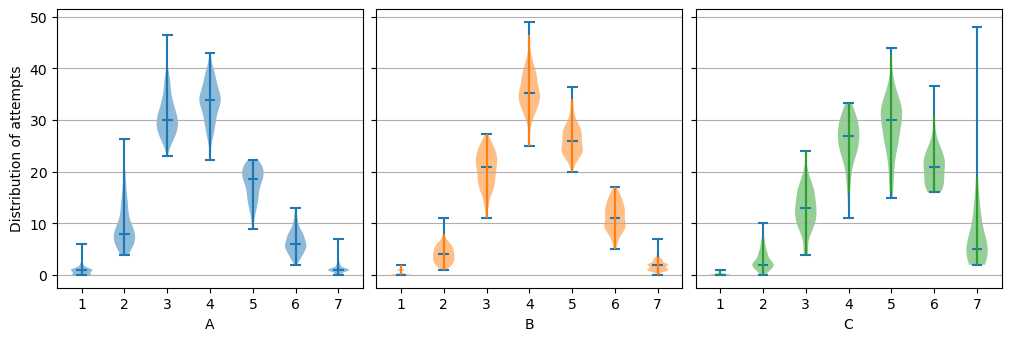

In [83]:
tab10 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',   # 使用颜色编码定义颜色
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
          
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(10,3.3), sharey=True)
for i in range(n_clusters):
    parts = axes[i].violinplot(df[kmeans.labels_==i].iloc[:, 1:8], vert=True, showmedians=True)
    axes[i].set_xlabel(labels[i])
    for pc in parts['bodies']:
        pc.set_facecolor(tab10[i])
        pc.set_alpha(0.5)

    ddata = [sorted((df[kmeans.labels_==i].iloc[:, j]).tolist()) for j in range(1, 8)]
    quartile1, medians, quartile3 = np.percentile(ddata, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(ddata, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    axes[i].vlines(inds, whiskers_min, whiskers_max, color=tab10[i], linestyle='-')

for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([1,2,3,4,5,6,7])

axes[0].set_ylabel('Distribution of attempts')

plt.savefig('violinplot.png', dpi=300)
plt.show()

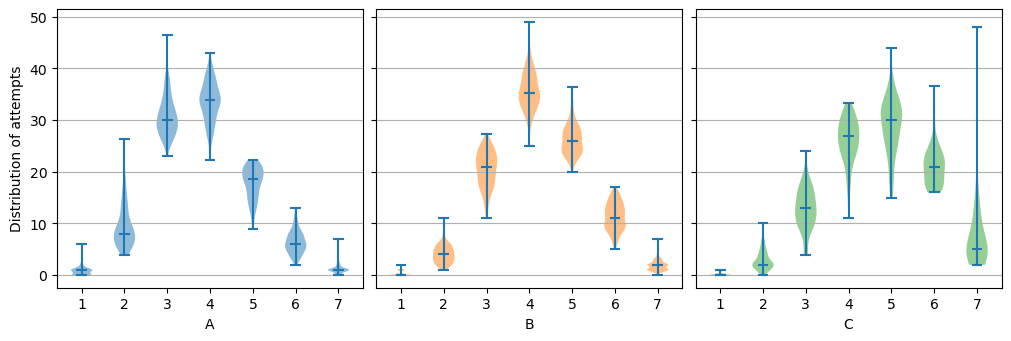

In [84]:
tab10 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',   # 使用颜色编码定义颜色
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
          
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(10,3.3), sharey=True)
for i in range(n_clusters):
    parts = axes[i].violinplot(df[kmeans.labels_==i].iloc[:, 1:8], vert=True, showmedians=True)
    axes[i].set_xlabel(labels[i])
    for pc in parts['bodies']:
        pc.set_facecolor(tab10[i])
        pc.set_alpha(0.5)
    # axes[i].hist(range(1,8), df[kmeans.labels_==i].iloc[:, 1:8], density=True)

for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([1,2,3,4,5,6,7])

axes[0].set_ylabel('Distribution of attempts')

plt.savefig('violinplot.png', dpi=300)
plt.show()

In [85]:
rng = np.random.default_rng(seed=0)

In [86]:
rng.random(data.shape)*10

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
data + rng.random(data.shape)*15

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,10.977246,14.861670,34.427227,39.971455,27.708497,22.930601,9.031705
1,11.559810,19.655502,36.903561,44.902577,30.155540,22.035787,3.007789
2,1.715858,11.017591,16.450594,32.285185,33.740949,29.002865,17.909708
3,4.454722,5.223229,30.298921,39.556879,35.554555,24.543636,3.453376
4,5.656458,9.490340,36.904708,40.778369,17.079126,9.801974,9.872793
...,...,...,...,...,...,...,...
354,11.376761,6.929610,25.116397,39.704871,43.690843,20.407256,15.275697
355,1.347543,17.236193,34.490185,50.763722,32.482631,19.283531,13.546482
356,1.998617,12.122066,24.293312,47.504733,33.905276,25.722059,9.639908
357,8.608755,13.027305,24.302043,40.721897,35.691408,12.091480,3.235236


In [ ]:
data_more.sort_index()

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Dif,sort_id
0,1.000000,3.000000,23.000000,39.000000,24.000000,9.000000,1.000000,413.000000,167
1,1.000000,5.000000,23.000000,31.000000,24.000000,14.000000,2.000000,422.000000,204
2,1.000000,3.000000,13.000000,27.000000,30.000000,22.000000,4.000000,464.000000,315
3,1.000000,4.000000,16.000000,30.000000,30.000000,17.000000,2.000000,443.000000,271
4,0.990099,8.910891,34.653465,33.663366,15.841584,4.950495,0.990099,373.267327,39
...,...,...,...,...,...,...,...,...,...
354,0.000000,2.000000,17.000000,35.000000,29.000000,14.000000,3.000000,445.000000,274
355,0.000000,3.030303,21.212121,40.404040,25.252525,9.090909,1.010101,419.191919,192
356,0.000000,2.000000,16.000000,38.000000,30.000000,12.000000,2.000000,440.000000,264
357,0.000000,4.040404,21.212121,38.383838,26.262626,9.090909,1.010101,418.181818,186


In [ ]:
[(kmeans.labels_==i).sum() for i in range(n_clusters)]

[134, 152, 73]

In [ ]:
data_more['e_label'] = 2
data_more['e_label'][data_more.sort_id<134+152] = 1
data_more['e_label'][data_more.sort_id<134] = 0
data_more.sort_index(inplace=True)

In [ ]:
data_more['k_label'] = 0
data_more['k_label'][kmeans.labels_==0] = 0
data_more['k_label'][kmeans.labels_==1] = 1
data_more['k_label'][kmeans.labels_==2] = 2

In [ ]:
data_more

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Dif,sort_id,e_label,k_label
0,1.000000,3.000000,23.000000,39.000000,24.000000,9.000000,1.000000,413.000000,167,1,1
1,1.000000,5.000000,23.000000,31.000000,24.000000,14.000000,2.000000,422.000000,204,1,1
2,1.000000,3.000000,13.000000,27.000000,30.000000,22.000000,4.000000,464.000000,315,2,2
3,1.000000,4.000000,16.000000,30.000000,30.000000,17.000000,2.000000,443.000000,271,1,2
4,0.990099,8.910891,34.653465,33.663366,15.841584,4.950495,0.990099,373.267327,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...
354,0.000000,2.000000,17.000000,35.000000,29.000000,14.000000,3.000000,445.000000,274,1,1
355,0.000000,3.030303,21.212121,40.404040,25.252525,9.090909,1.010101,419.191919,192,1,1
356,0.000000,2.000000,16.000000,38.000000,30.000000,12.000000,2.000000,440.000000,264,1,1
357,0.000000,4.040404,21.212121,38.383838,26.262626,9.090909,1.010101,418.181818,186,1,1


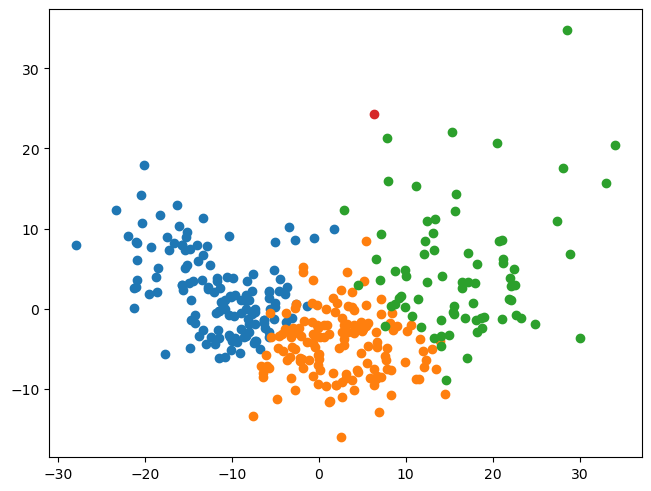

In [ ]:
new_data = data + rng.random(data.shape)*5
n_clusters = 3
kmeans_test = KMeans(n_clusters=n_clusters, random_state=88, n_init="auto").fit(new_data)
for i in range(n_clusters):
    word_ls = list(df['Word'][kmeans_test.labels_==i])
    word_ls = sorted(word_ls)

for i in range(n_clusters):
    plt.scatter(data_2d[kmeans_test.labels_==i,0], data_2d[kmeans_test.labels_==i,1], label=labels[i])
plt.scatter(eerie_2d[:,0], eerie_2d[:,1], label='eerie')

new_data['k_label'] = 0
new_data['k_label'][kmeans_test.labels_==0] = 0
new_data['k_label'][kmeans_test.labels_==1] = 1
new_data['k_label'][kmeans_test.labels_==2] = 2

In [ ]:
metrics.f1_score(data_more.e_label, new_data.k_label, average='macro')

0.8959325013082088

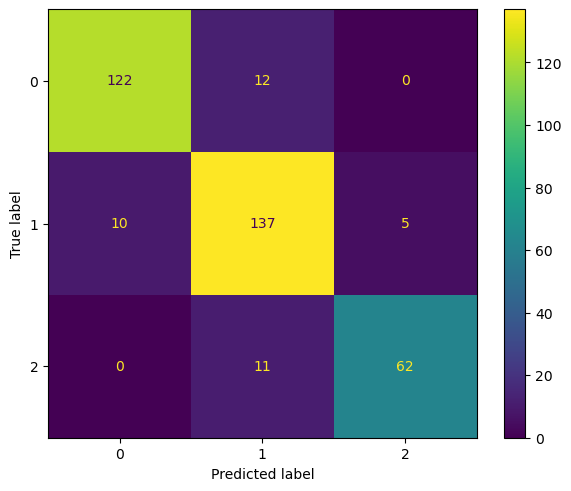

In [ ]:
# 使用拟合模型，我们计算模型对测试数据集的预测。这些预测用于计算使用 :class:ConfusionMatrixDisplay 绘制的混淆矩阵


cm = confusion_matrix(data_more.e_label, new_data.k_label)

cm_display = ConfusionMatrixDisplay(cm).plot()

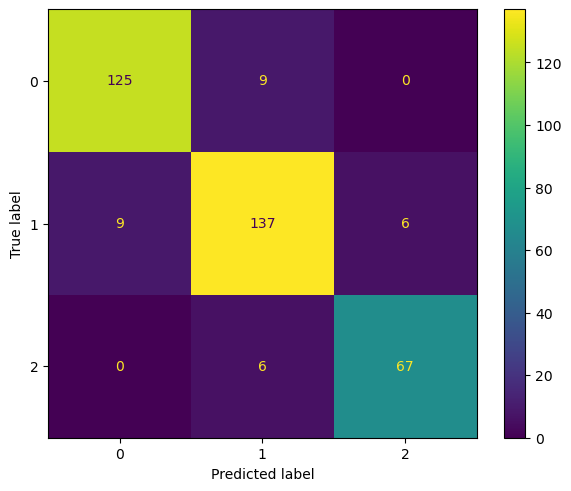

In [ ]:
# 使用拟合模型，我们计算模型对测试数据集的预测。这些预测用于计算使用 :class:ConfusionMatrixDisplay 绘制的混淆矩阵
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn import metrics

cm = confusion_matrix(data_more.e_label, data_more.k_label)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
metrics.f1_score(data_more.e_label, data_more.k_label, average='macro')
metrics.f1_score(data_more.e_label, new_data.k_label, average='macro')

0.8937375490007069

In [ ]:
data

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,1.000000,3.000000,23.000000,39.000000,24.000000,9.000000,1.000000
1,1.000000,5.000000,23.000000,31.000000,24.000000,14.000000,2.000000
2,1.000000,3.000000,13.000000,27.000000,30.000000,22.000000,4.000000
3,1.000000,4.000000,16.000000,30.000000,30.000000,17.000000,2.000000
4,0.990099,8.910891,34.653465,33.663366,15.841584,4.950495,0.990099
...,...,...,...,...,...,...,...
354,0.000000,2.000000,17.000000,35.000000,29.000000,14.000000,3.000000
355,0.000000,3.030303,21.212121,40.404040,25.252525,9.090909,1.010101
356,0.000000,2.000000,16.000000,38.000000,30.000000,12.000000,2.000000
357,0.000000,4.040404,21.212121,38.383838,26.262626,9.090909,1.010101


In [ ]:
new_data.iloc[:, 0] += rng.random(data.shape[0])*i
new_data

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),k_label
0,4.697792,7.357504,27.737034,43.356528,25.099555,13.587293,2.041400,1
1,5.731234,8.934041,24.399984,34.548320,26.583022,17.271002,5.727583,1
2,4.329093,6.120976,16.153137,27.837924,31.730866,22.414339,7.784795,2
3,4.040354,5.901886,16.154218,32.769456,32.709517,19.293385,6.139217,2
4,1.791742,13.522969,39.522034,34.410523,20.194861,8.024210,5.541996,0
...,...,...,...,...,...,...,...,...
354,4.447156,6.280807,17.262212,35.825551,30.219837,14.471021,7.963079,1
355,2.182013,3.518254,23.446945,45.231760,28.211582,13.789735,1.720031,1
356,4.354834,5.567822,18.689693,39.233307,32.107297,14.596778,6.311325,1
357,3.903637,8.097018,22.817854,40.001291,29.570393,14.065876,1.531375,1


In [ ]:
rng.random(new_data.shape)

array([[0.40567533, 0.92341871, 0.85780784, ..., 0.03596903, 0.48996929,
        0.34195353],
       [0.70552555, 0.33551735, 0.15456912, ..., 0.53994206, 0.59365003,
        0.13257278],
       [0.98111983, 0.53289831, 0.6527861 , ..., 0.71800016, 0.77797068,
        0.45013069],
       ...,
       [0.53670223, 0.68064044, 0.3572336 , ..., 0.04833999, 0.52820043,
        0.73073522],
       [0.30343802, 0.41885373, 0.87211831, ..., 0.75842575, 0.86980184,
        0.34414063],
       [0.81766084, 0.50928402, 0.69537028, ..., 0.06224016, 0.80370938,
        0.07409692]])

In [ ]:
data

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,1.000000,3.000000,23.000000,39.000000,24.000000,9.000000,1.000000
1,1.000000,5.000000,23.000000,31.000000,24.000000,14.000000,2.000000
2,1.000000,3.000000,13.000000,27.000000,30.000000,22.000000,4.000000
3,1.000000,4.000000,16.000000,30.000000,30.000000,17.000000,2.000000
4,0.990099,8.910891,34.653465,33.663366,15.841584,4.950495,0.990099
...,...,...,...,...,...,...,...
354,0.000000,2.000000,17.000000,35.000000,29.000000,14.000000,3.000000
355,0.000000,3.030303,21.212121,40.404040,25.252525,9.090909,1.010101
356,0.000000,2.000000,16.000000,38.000000,30.000000,12.000000,2.000000
357,0.000000,4.040404,21.212121,38.383838,26.262626,9.090909,1.010101


In [ ]:
new_data = data.iloc[:,:-1].copy()
new_data += rng.random(new_data.shape)*i
new_data

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries
0,2.396252,3.325836,23.170539,40.225770,24.359017,9.967651
1,2.816982,6.087701,24.691875,31.591291,24.576047,14.692387
2,2.461209,3.779069,14.657906,27.083014,30.722860,23.614547
3,2.528081,5.341782,17.141255,30.825919,31.053301,17.511789
4,2.445717,9.968986,36.412720,33.749007,16.026889,6.877937
...,...,...,...,...,...,...
354,0.154508,3.958737,17.172341,35.399093,29.662167,15.843286
355,1.342670,4.887384,22.829844,41.176972,25.528144,10.278905
356,0.506477,3.378231,17.702843,39.167594,30.437300,12.475271
357,0.083622,5.082503,21.379691,39.580257,26.579721,10.625286


In [ ]:
kml

,mean,label
0,381.697979,1
1,425.258777,2
2,475.501753,3


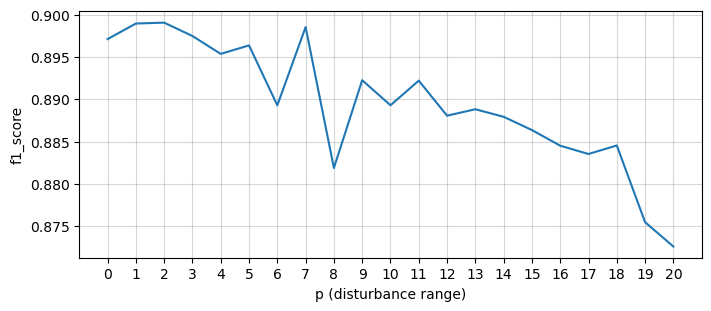

In [ ]:
score = []

for i in range(21):
    f1_score = 0
    n=10
    for j in range(n):
        rng = np.random.default_rng(seed=j)
        new_data = data.iloc[:,:-1].copy()
        # new_data.iloc[:, 0] += rng.random(data.shape[0])*i
        new_data += rng.random(new_data.shape)*i*new_data/100
        n_clusters = 3
        kmeans_test = KMeans(n_clusters=n_clusters, random_state=88, n_init="auto").fit(new_data)

        kml = pd.DataFrame([((df.iloc[kmeans_test.labels_==i,1:8] * [1,2,3,4,5,6,7]).mean()).sum() for i in range(3)], columns=['mean'])
        kml.sort_values('mean', inplace=True)
        kml['label'] = range(0,3)
        kml.sort_index(inplace=True)

        new_data['k_label'] = 0
        new_data['k_label'][kmeans_test.labels_==0] = kml.label[0]
        new_data['k_label'][kmeans_test.labels_==1] = kml.label[1]
        new_data['k_label'][kmeans_test.labels_==2] = kml.label[2]
        f1_score+=metrics.f1_score(data_more.e_label, new_data.k_label, average='macro')
    f1_score/=n
    score.append(f1_score)

plt.figure(figsize=(7,3))
plt.plot(score)
plt.xticks(np.arange(21))
plt.xlabel('p (disturbance range)')
plt.ylabel('f1_score')

plt.grid(alpha=0.5)

plt.savefig('f1_score of kmeans.svg')
plt.show()

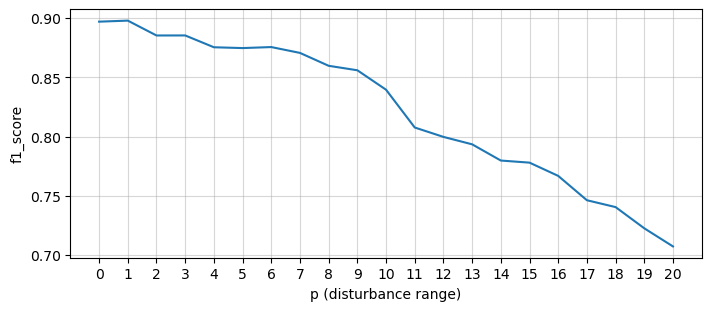

In [ ]:
score = []

for i in range(21):
    f1_score = 0
    n=10
    for j in range(n):
        rng = np.random.default_rng(seed=j)
        new_data = data.iloc[:,:-1].copy()
        # new_data.iloc[:, 0] += rng.random(data.shape[0])*i
        new_data += rng.random(new_data.shape)*i
        n_clusters = 3
        kmeans_test = KMeans(n_clusters=n_clusters, random_state=88, n_init="auto").fit(new_data)

        kml = pd.DataFrame([((df.iloc[kmeans_test.labels_==i,1:8] * [1,2,3,4,5,6,7]).mean()).sum() for i in range(3)], columns=['mean'])
        kml.sort_values('mean', inplace=True)
        kml['label'] = range(0,3)
        kml.sort_index(inplace=True)

        new_data['k_label'] = 0
        new_data['k_label'][kmeans_test.labels_==0] = kml.label[0]
        new_data['k_label'][kmeans_test.labels_==1] = kml.label[1]
        new_data['k_label'][kmeans_test.labels_==2] = kml.label[2]
        f1_score+=metrics.f1_score(data_more.e_label, new_data.k_label, average='macro')
    f1_score/=n
    score.append(f1_score)

plt.figure(figsize=(7,3))
plt.plot(score)
plt.xticks(np.arange(21))
plt.xlabel('p (disturbance range)')
plt.ylabel('f1_score')

plt.grid(alpha=0.5)

plt.savefig('f1_score of kmeans.svg')
plt.show()

In [ ]:
metrics.adjusted_rand_score(data_more.e_label, data_more.k_label)

0.7538620736594722

In [ ]:
for i in range(n_clusters):
    print(((df.iloc[kmeans.labels_==i,1:8] * [1,2,3,4,5,6,7]).mean()).sum())

381.69797931935244
425.2587766161149
475.50175291501745


In [ ]:
(np.array([0.002720021,0.07607339,0.2947729,0.3631916,0.1927788,0.06082386,0.009639475]) * [1,2,3,4,5,6,7]).sum()

3.888265386

In [ ]:
feature = df.iloc[:,8:]
feature['level'] = kmeans.labels_
feature.head()

,letter_freq_score,letter_dup,word_freq_score,word_sim,bigram_freq_score,level
0,0.381061,0.0,0.378564,0.260870,0.411294,1
1,0.508926,0.0,0.430813,0.521739,0.594332,1
2,0.682474,1.0,0.386898,0.217391,0.570721,2
3,0.137907,0.0,0.437274,0.043478,0.596806,2
4,0.498868,0.0,0.700724,0.173913,0.579820,0


In [ ]:
X = feature.iloc[:,:-1]
y = feature.iloc[:,-1]

In [ ]:
clf = LR(random_state=10).fit(X, y)
clf.score(X, y) 

0.6100278551532033

In [ ]:
data_more.e_label

0      1
1      1
2      2
3      1
4      0
      ..
354    1
355    1
356    1
357    1
358    1
Name: e_label, Length: 359, dtype: int64

In [ ]:
roc_auc_score(data_more.e_label, y)

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
clf.coef_

array([[ 2.38548886, -1.34053858,  1.34465633, -0.84567243,  1.37055732],
       [-0.39924048,  0.34345807, -0.51728681, -1.12563792, -0.37230021],
       [-1.98624838,  0.99708052, -0.82736952,  1.97131036, -0.99825711]])

In [ ]:
clf.predict([[1.03075587, 1.        , 0.37240928, 0.08695652, 0.7425465]])

array([1])

In [ ]:
import statsmodels.api as sm

In [ ]:
(df.iloc[:,1:8] * np.array([1,2,3,4,5,6,7])).sum(axis=1)

0      413.000000
1      422.000000
2      464.000000
3      443.000000
4      373.267327
          ...    
354    445.000000
355    419.191919
356    440.000000
357    418.181818
358    438.383838
Length: 359, dtype: float64

In [ ]:
X = sm.add_constant(feature.iloc[:,:-1])
y = (df.iloc[:,1:8] * np.array([1,2,3,4,5,6,7])).sum(axis=1)

In [ ]:
metrics.r2_score(y, result.predict(X))

0.45337765088971216

In [ ]:
model = sm.OLS(y, X) #生成模型  
result = model.fit() #模型拟合  
result.summary() #模型描述 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     58.56
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.77e-44
Time:                        13:24:57   Log-Likelihood:                -1719.9
No. Observations:                 359   AIC:                             3452.
Df Residuals:                     353   BIC:                             3475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               485.3932      7.610     63.783      0.000     470.426     500.360
letter_freq_score   -78.7856     12.138     -6.491      0.000    -102.658     -54.913
letter_dup           34.4501      3.520      9.787      0.000      27.528      41.373
word_freq_score     -46.7272      8.494     -5.501      0.000     -63.433     -30.021
word_sim             59.9280      8.900      6.733      0.000      42.424      77.432
bigram_freq_score   -37.4599     16.078     -2.330      0.020     -69.081      -5.839
==============================================================================
Omnibus:                       11.913   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.216
Skew:                           0.360   Prob(JB):                      0.00135
Kurtosis:                       3.603   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result.predict([[1, 1.03075587, 1.        , 0.37240928, 0.08695652]])

ValueError: shapes (1,5) and (6,) not aligned: 5 (dim 1) != 6 (dim 0)